In [ ]:
#AUTOMATIC ASSESSMENT OF PAVEMENT CONDITION  USING ROAD PHOTOGRAPHS                                                          

 **Problem Statement Description** : Works constructed under the PMGSY scheme are to be maintained by the contractor as per the PMGSY guidelines. Pavement Condition Index is required to be performed to identify the road condition and further to take the maintenance or upgradation of the work. Through EMARG and PMGSY-III, NRIDA has collected a vast collection of pictures of roads. These pictures are collected while doing inspection of roads or collection of PCI through visual inspections. An AI assisted module would be able to automatically assess the picture and identify common issues such as shoulder clearance, potholes, road furniture etc. Requirement is of a solution where there should be a provision to capture the chainage wise pavement condition index. **Use of open source software and existing neural network is encouraged.Train a machine learning model**. which is able to identify common issues with pavement based on photograph(s) per road alone. Data Required: Yes (Annotated images to be released by NRIDA). **BY Ministry of Rural Development, PS Number:MK199, Domain Bucket : Agriculture and Rural Development, Category :Software**


In this , we will build a classifier model from scratch that is able to assess the condition of road. We will follow these steps:

1. Explore the example data
2. Build a small convnet to solve our Classification problem
3. Evaluate training accuracy

**Libraries Used:**

 **TFLearn**– Deep learning library featuring a higher-level API for TensorFlow used to create layers of our CNN
 **numpy** – To process the image matrices
 **open-cv** – To process the image like converting them to grayscale and etc.
 **os** – To access the file system to read the image from the train and test directory from our machines
 **random** – To shuffle the data to overcome the biasing
 **matplotlib** – To display the result of our predictive outcome.
 **tensorflow** – Just to use the tensorboard to compare the loss and adam curve our result data or obtained log. 

In [ ]:
import cv2 #to preprocess images(open cv)
import os #to access file directories
import numpy as np # to deal with multidimensional matrices
from random import shuffle 
from tqdm import tqdm
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf 
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression 

'''Setting up the env'''
  

IMG_SIZE = 150
LR = 1e-3

curses is not supported on this machine (please install/reinstall curses for an optimal experience)








**Explore the training Data**
   The contents of the  base directory , which contains `good`, `satisfactory`,`poor` and`verypoor`  subdirectories for the training  dataset.(consisting 2673 images).

In [ ]:
base_dir = 'C:/Users/Govar/OneDrive/Desktop/sih_road_dataset_final'
train_good_dir = os.path.join(base_dir, 'good')
train_poor_dir = os.path.join(base_dir, 'poor')
train_satisfactory_dir = os.path.join(base_dir, 'satisfactory')
train_very_poor_dir = os.path.join(base_dir, 'very_poor')

Now, let's see what the filenames look like in the `good`, `satisfactory`,`poor` and`verypoor` in `train` directories.

In [ ]:
train_good_fnames = os.listdir(train_good_dir)
print(train_good_fnames[:20])
train_poor_fnames = os.listdir(train_poor_dir)
print(train_poor_fnames[:20])
train_satisfactory_fnames = os.listdir(train_satisfactory_dir)
print(train_satisfactory_fnames[:20])
train_very_poor_fnames = os.listdir(train_very_poor_dir)
print(train_very_poor_fnames[:20])


['good_001.JPG', 'good_002.JPG', 'good_003.JPG', 'good_004.JPG', 'good_005.JPG', 'good_006.JPG', 'good_007.JPG', 'good_008.JPG', 'good_009.JPG', 'good_010.JPG', 'good_011.JPG', 'good_012.JPG', 'good_013.JPG', 'good_014.JPG', 'good_015.JPG', 'good_016.JPG', 'good_017.JPG', 'good_018.JPG', 'good_019.JPG', 'good_020.JPG']
['poor_001.jpg', 'poor_002.jpg', 'poor_003.jpg', 'poor_004.jpg', 'poor_005.jpg', 'poor_006.jpg', 'poor_007.jpg', 'poor_008.jpg', 'poor_009.jpg', 'poor_010.jpg', 'poor_011.jpg', 'poor_012.jpg', 'poor_013.jpg', 'poor_014.jpg', 'poor_015.jpg', 'poor_016.jpg', 'poor_017.jpg', 'poor_018.jpg', 'poor_019.jpg', 'poor_020.jpg']
['satisfactory_001.jpg', 'satisfactory_002.jpg', 'satisfactory_003.jpg', 'satisfactory_004.jpg', 'satisfactory_005.jpg', 'satisfactory_006 - Copy.jpg', 'satisfactory_006.jpg', 'satisfactory_007.jpg', 'satisfactory_008.jpg', 'satisfactory_009.jpg', 'satisfactory_010.jpg', 'satisfactory_011.jpg', 'satisfactory_012.jpg', 'satisfactory_013.jpg', 'satisfactory_

**find out the total number of images in the train  dataset**

In [ ]:
print('total training good images:', len(os.listdir(train_good_dir)))
print('total training bad images:', len(os.listdir(train_poor_dir)))
print('total training very bad images:', len(os.listdir(train_very_poor_dir)))
print('total training satisfactory images:', len(os.listdir(train_satisfactory_dir)))

total training good images: 845
total training bad images: 606
total training very bad images: 612
total training satisfactory images: 613


Now let's take a look at a few pictures to get a better sense of how the  dataset look like. First, configure the matplot parameters:

In [ ]:
%matplotlib inline
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 pictures of each category

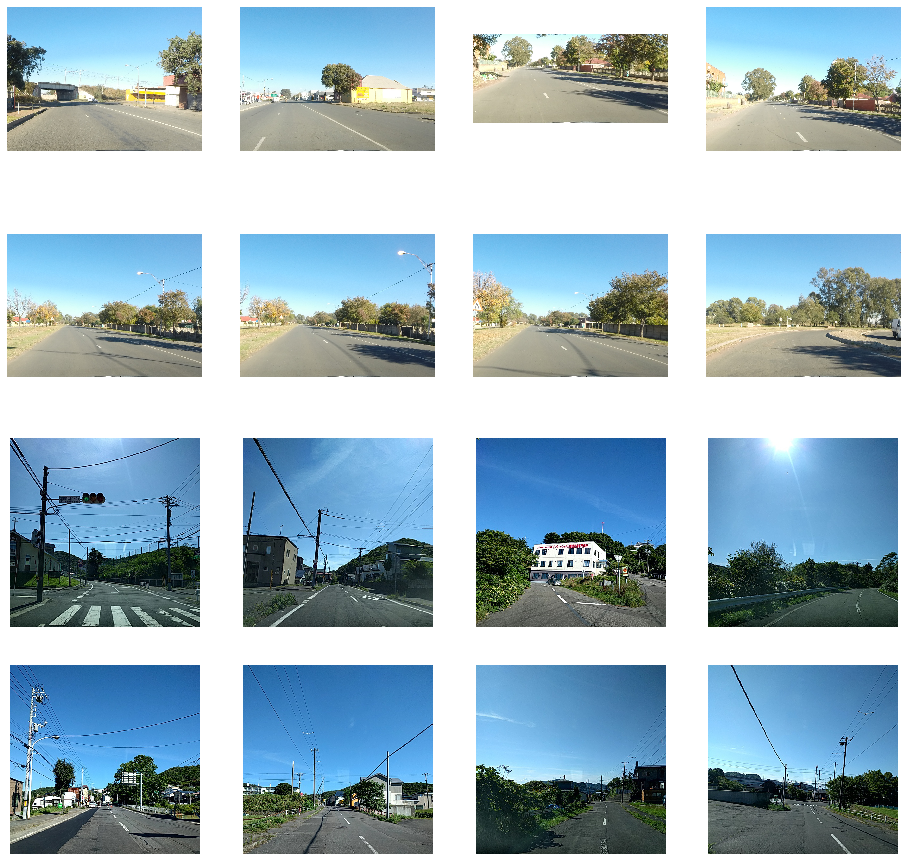

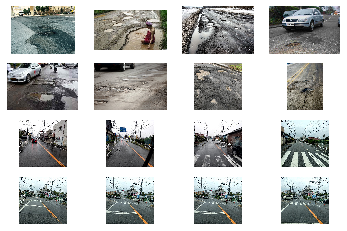

In [ ]:
fig = plt.gcf() #get a reference to current figure
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_good_pix = [os.path.join(train_good_dir, fname) 
                for fname in train_good_fnames[pic_index-8:pic_index]]
next_satisfactory_pix = [os.path.join(train_satisfactory_dir, fname) 
                for fname in train_satisfactory_fnames[pic_index-8:pic_index]]
next_poor_pix = [os.path.join(train_poor_dir, fname) 
                for fname in train_poor_fnames[pic_index-8:pic_index]]
next_very_poor_pix = [os.path.join(train_very_poor_dir, fname) 
                for fname in train_very_poor_fnames[pic_index-8:pic_index]]


for i, img_path in enumerate(next_good_pix+next_poor_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()
for i, img_path in enumerate(next_very_poor_pix+next_satisfactory_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Assigning Labels to the images present in dataset

In [ ]:
def label_img(img):  
    word_label=img.split('_')[0]
    print(word_label)
    if word_label == 'good':  return [1, 0,0,0] 
    elif word_label == 'poor': return [0, 1,0,0]
    elif word_label == 'satisfactory': return [0, 0,1,0] 
    elif word_label == 'verypoor': return [0, 0,0,1]  

**Preprocessing the data using opencv**

In [ ]:
training_data=[]
# loading the training data 
def create_train_data(p): 
  
    for img in os.listdir(p): 
  
        try :
          label = label_img(img) 
  
          path = os.path.join(p, img) 
  
        # loading the image from the path and then converting them into 
        # greyscale for easier covnet prob 
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
  
        # resizing the image for processing them in the covnet 
          img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) 
  
        # final step-forming the training data list with numpy array of the images 
          training_data.append([np.array(img), np.array(label)]) 
        except :
           pass
    return training_data

**Creating training dataset**

In [ ]:
for i in [train_good_dir,train_satisfactory_dir,train_very_poor_dir,train_poor_dir] :
    v=create_train_data(i)

good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good


verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
verypoor
v

**Shuffling and Converting the dataset into numpy array**

In [ ]:
#shuffle(training_data) 
for i in range(100) :
    random.shuffle(training_data)

In [ ]:
t=np.array(training_data) #converting into numpy array

In [ ]:
np.shape(training_data)

(2674, 2)

**Saving the training data**

In [ ]:
np.save('train_data.npy', training_data)  
#training_data = np.load('training_data.npy') 

**Training images after Preprocessing**

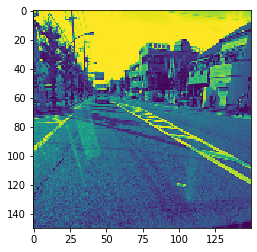

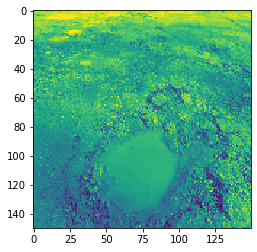

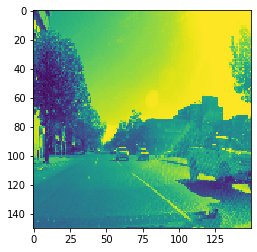

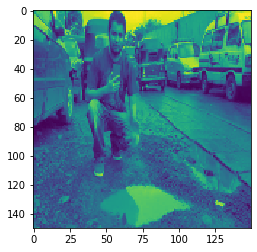

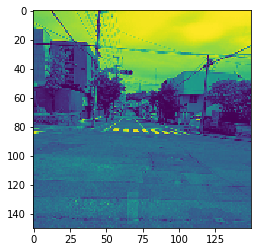

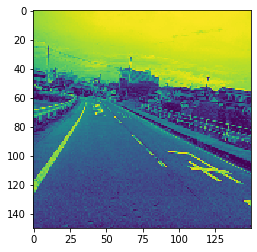

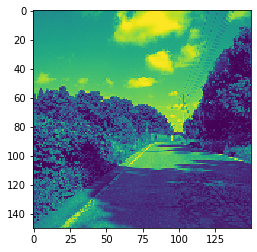

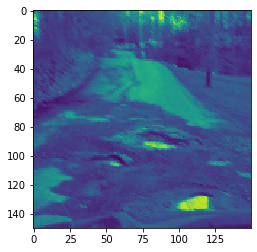

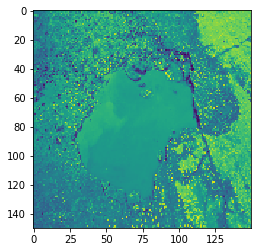

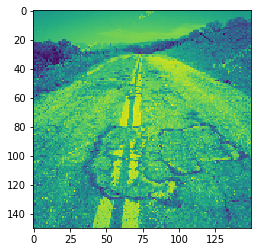

In [ ]:
for img in training_data[:10] :
    plt.imshow(img[0])
    plt.show()
    

**Building Convnet**

The images that will go into our convnet are 150x150 gray scale images.
The architecture- We will stack 5 {convolution + relu + maxpooling} modules and a dropout and fullyconnected layer. 

In [ ]:
tf.reset_default_graph() 
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 
  
convnet = fully_connected(convnet, 4, activation ='softmax') 
convnet = regression(convnet, optimizer ='adam', learning_rate = LR, 
      loss ='categorical_crossentropy', name ='targets') 
  
model = tflearn.DNN(convnet, tensorboard_dir ='log') 
  



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where







**Feeding data to the model and saving it**

In [ ]:
model_name='pavement_assessment'

In [ ]:
X = np.array([i[0] for i in v]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
Y = [i[1] for i in v] 
  
'''Fitting the data into our model'''
# epoch = 5 taken 
model.fit({'input': X}, {'targets': Y}, n_epoch = 5,snapshot_step=500,show_metric=True,run_id=model_name)  

Training Step: 209  | total loss: 0.28352 | time: 50.683s
| Adam | epoch: 005 | loss: 0.28352 - acc: 0.9008 -- iter: 2624/2674
Training Step: 210  | total loss: 0.31233 | time: 51.925s
| Adam | epoch: 005 | loss: 0.31233 - acc: 0.8920 -- iter: 2674/2674
--
INFO:tensorflow:C:\Users\Govar\Downloads\road_pickle.sav is not in all_model_checkpoint_paths. Manually adding it.


In [ ]:
model.save(model_name)

INFO:tensorflow:C:\Users\Govar\Downloads\pavement_assessment is not in all_model_checkpoint_paths. Manually adding it.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'dict' object has no attribute 'name'


In [ ]:
r.load(model_name)

NameError: name 'r' is not defined

In [ ]:
tf.reset_default_graph() 
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 
  
convnet = fully_connected(convnet, 4, activation ='softmax') 
convnet = regression(convnet, optimizer ='adam', learning_rate = LR, 
      loss ='categorical_crossentropy', name ='targets') 
  
m = tflearn.DNN(convnet, tensorboard_dir ='log') 
  

In [ ]:
m.load(model_name)

INFO:tensorflow:Restoring parameters from C:\Users\Govar\Downloads\pavement_assessment


In [ ]:
from sklearn.metrics import accuracy_score
y_predict=m.predict(X)
accuracy_score(np.argmax(Y,axis=1),np.argmax(y_predict,axis=1))*100 

91.54824233358265

In [ ]:
for num, data in enumerate(training_data[:20]): 
    
       
    img_data = data[0] 
       
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1) 
   
    model_out = model.predict([data])[0]
    print(num,'--->',model_out,'--->',end=' ')
    test_class = np.argmax(model_out)
    test_class = test_class.tolist()
    labels=['good', 'poor','satisfactory','verypoor']
    print(labels[test_class])


0 ---> [0.00189989 0.8704256  0.11743034 0.01024415] ---> poor
1 ---> [3.4592958e-04 3.8670757e-04 1.7848939e-05 9.9924952e-01] ---> verypoor
2 ---> [9.9931109e-01 4.8246369e-04 3.2463053e-05 1.7389310e-04] ---> good
3 ---> [4.1237185e-03 6.9957110e-03 7.1122410e-04 9.8816931e-01] ---> verypoor
4 ---> [2.0113277e-04 9.8242086e-01 1.6029498e-02 1.3485053e-03] ---> poor
5 ---> [3.1211146e-04 5.6783408e-01 4.2975971e-01 2.0940888e-03] ---> poor
6 ---> [2.6860155e-04 9.6980840e-01 2.8568022e-02 1.3549684e-03] ---> poor
7 ---> [0.41363585 0.07748203 0.02659825 0.48228392] ---> verypoor
8 ---> [2.8763150e-04 3.8216801e-04 1.7305834e-05 9.9931288e-01] ---> verypoor
9 ---> [1.4930559e-04 1.7299430e-04 4.0209957e-06 9.9967360e-01] ---> verypoor
10 ---> [0.00951867 0.6062267  0.34300742 0.04124724] ---> poor
11 ---> [0.49274608 0.3273043  0.04911166 0.13083796] ---> good
12 ---> [9.9977094e-01 1.8863202e-04 5.6484496e-06 3.4852172e-05] ---> good
13 ---> [9.9929464e-01 4.8198621e-04 3.4904340e-05

**Preprocessing testing data**

In [ ]:
def process_test_data(TEST_DIR): 
    testing_data = [] 
    try :
        for img in tqdm(os.listdir(TEST_DIR)): 
            path = os.path.join(TEST_DIR, img) 
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) 
            testing_data.append([np.array(img)]) 
    except :
        img = cv2.imread(TEST_DIR, cv2.IMREAD_GRAYSCALE) 
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) 
        testing_data.append([np.array(img)]) 
        
          
    shuffle(testing_data)  
    return testing_data 

In [ ]:
import matplotlib.pyplot as plt 
# if you need to create the data: 
# test_data = process_test_data() 
# if you already have some saved:  
def predict(test_path):
    fig = plt.figure() 
    testing_data=process_test_data(test_path)
    for num, data in enumerate(testing_data[:6]): 
        img_data = data[0] 

        data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1) 

        model_out = model.predict([data])[0]
        #print(model_out)
        test_class = np.argmax(model_out)
        test_class = test_class.tolist()
        labels=['good', 'poor','satisfactory','verypoor']
        str_label=labels[test_class]


        y = fig.add_subplot(5, 6, num + 1) 
        orig = img_data 
        
        y.imshow(orig, cmap ='gray') 
        plt.title(str_label) 
        y.axes.get_xaxis().set_visible(False) 
        y.axes.get_yaxis().set_visible(False) 
    plt.show() 

**Predicting The result**

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 46.28it/s]


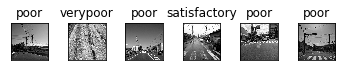

In [ ]:
predict('C:/Users/Govar/OneDrive/Desktop/testing')

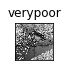

In [ ]:
predict('C:/Users/Govar/Desktop/test2.jpg')

In [ ]:
import matplotlib.pyplot as plt 
# if you need to create the data: 
# test_data = process_test_data() 
# if you already have some saved:  
def predict(test_path):
    fig = plt.figure() 
    testing_data=process_test_data(test_path)
    for num, data in enumerate(testing_data[:6]): 
        img_data = data[0] 

        data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1) 

        model_out = model.predict([data])[0]
        #print(model_out)
        test_class = np.argmax(model_out)
        test_class = test_class.tolist()
        labels=['good', 'poor','satisfactory','verypoor']
        str_label=labels[test_class]


        y = fig.add_subplot(5, 6, num + 1) 
        orig = img_data 
        
        y.imshow(orig, cmap ='gray') 
        plt.title(str_label) 
        y.axes.get_xaxis().set_visible(False) 
        y.axes.get_yaxis().set_visible(False) 
    plt.show() 

In [ ]:
report=[]
def process_test_data(TEST_DIR): 
    testing_data = [] 
    place=TEST_DIR.split('/')[6]
    street=TEST_DIR.split('/')[7]
    try :
        for img in tqdm(os.listdir(TEST_DIR)): 
            name=img.split('.')[0]
            path = os.path.join(TEST_DIR, img) 
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) 
            testing_data.append([np.array(img)]) 
            report.append([np.array(img),name,place,street])
    except :
        img = cv2.imread(TEST_DIR, cv2.IMREAD_GRAYSCALE) 
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) 
        testing_data.append([np.array(img)]) 
        
          
    shuffle(testing_data) 
    shuffle(report)
    return testing_data,report 

In [ ]:
import matplotlib.pyplot as plt 
# if you need to create the data: 
# test_data = process_test_data() 
# if you already have some saved:  
def predict(test_path):
    fig = plt.figure() 
    testing_data,report_data=process_test_data(test_path)
    print('s.no\tfilename\t\t\tplace\t\tstreet\t\tlabel')
    for num, data in enumerate(report_data[:50]): 
        img_data = data[0] 

        data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1) 

        model_out = model.predict([data])[0]
        #print(model_out)
        test_class = np.argmax(model_out)
        test_class = test_class.tolist()
        labels=['good', 'poor','satisfactory','verypoor']
        str_label=labels[test_class]


        y = fig.add_subplot(5, 6, num + 1) 
        orig = img_data 
        
        y.imshow(orig, cmap ='gray') 
        plt.title(str_label) 
        print(num,'\t',report_data[num][-3],'\t',report_data[num][-2],'\t',report_data[num][-1],'\t',str_label)
        y.axes.get_xaxis().set_visible(False) 
        y.axes.get_yaxis().set_visible(False)
    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 50.84it/s]


s.no	filename			place		street		label
0 	 test (12) 	 gudlavalleru 	 street1 	 poor
1 	 test (1) 	 gudlavalleru 	 street1 	 good
2 	 test (7) 	 gudlavalleru 	 street1 	 poor
3 	 test (4) 	 gudlavalleru 	 street1 	 good
4 	 test (3) 	 gudlavalleru 	 street1 	 good
5 	 test (9) 	 gudlavalleru 	 street1 	 poor
6 	 test (14) 	 gudlavalleru 	 street1 	 satisfactory
7 	 test (2) 	 gudlavalleru 	 street1 	 good
8 	 test (5) 	 gudlavalleru 	 street1 	 good
9 	 test (8) 	 gudlavalleru 	 street1 	 poor
10 	 test (6) 	 gudlavalleru 	 street1 	 good
11 	 test (15) 	 gudlavalleru 	 street1 	 verypoor
12 	 test (11) 	 gudlavalleru 	 street1 	 poor
13 	 test (16) 	 gudlavalleru 	 street1 	 verypoor
14 	 test (10) 	 gudlavalleru 	 street1 	 poor
15 	 test (13) 	 gudlavalleru 	 street1 	 poor


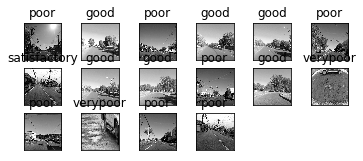

In [ ]:
predict('C:/Users/Govar/OneDrive/Desktop/test_m/gudlavalleru/street1')
#predict('C:/Users/Govar/OneDrive/Desktop/test_m/vijayawada/street1')

100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 121.03it/s]


s.no	filename			place		street		label
0 	 test (7) 	 gudlavalleru 	 street1 	 poor
1 	 test (12) 	 gudlavalleru 	 street1 	 poor
2 	 test (15) 	 gudlavalleru 	 street1 	 verypoor
3 	 test (6) 	 gudlavalleru 	 street1 	 good
4 	 test (1) 	 gudivada 	 street2 	 poor
5 	 test (4) 	 gudivada 	 street2 	 satisfactory
6 	 test (6) 	 gudivada 	 street2 	 satisfactory
7 	 test (9) 	 gudivada 	 street2 	 verypoor
8 	 test (2) 	 gudlavalleru 	 street1 	 good
9 	 test (2) 	 gudivada 	 street2 	 satisfactory
10 	 test (7) 	 gudivada 	 street2 	 verypoor
11 	 test (11) 	 gudlavalleru 	 street1 	 poor
12 	 test (3) 	 gudivada 	 street2 	 poor
13 	 test (10) 	 gudivada 	 street2 	 verypoor
14 	 test (12) 	 gudivada 	 street2 	 poor
15 	 test (16) 	 gudlavalleru 	 street1 	 verypoor
16 	 test (10) 	 gudlavalleru 	 street1 	 poor
17 	 test (9) 	 gudlavalleru 	 street1 	 poor
18 	 test (13) 	 gudlavalleru 	 street1 	 poor
19 	 test (1) 	 gudlavalleru 	 street1 	 good
20 	 test (3) 	 gudlavalleru 	 street

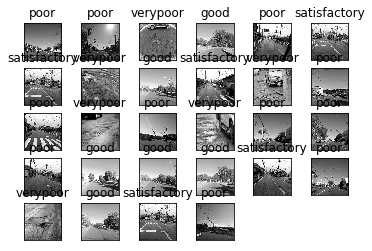

In [ ]:
predict('C:/Users/Govar/OneDrive/Desktop/test_m/gudivada/street2')